<a href="https://colab.research.google.com/github/gustavox0/MasterBigData/blob/main/M2_AG_Grupo17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#monto la carpeta de drive para trabajar los archivos desde ahí
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Instalo el paquete graphviz para crear el arbol de decision
!pip install graphviz==0.20.1 #instalar graphviz

In [ ]:

#Cargo los paquetes pandas y numpy como pd y np, respectivamente. Asi como
#matplotlib y seaborn para los graficos y el paquete Digraph de graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
from IPython.display import display
from PIL import Image

In [ ]:
#Cargo la base de covid
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tema1MBDDS/worlddometer_covid_ue.csv',sep=';')
df.head(5)

,Num,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
0,0,Europe,"3,543,710","10,493","207,347",149.0,"2,063,335","1,273,028","5,619",NaN,NaN,NaN,NaN,NaN
1,1,Russia,"990,326","4,98","17,093",68.0,"806,982","166,251","2,3","6,786",117,"36,400,000","249,409","145,944,843"
2,2,Spain,"455,621",NaN,"29,011",NaN,NaN,NaN,751,"9,744",620,"8,517,446","182,161","46,757,783"
3,3,UK,"332,752",NaN,"41,498",NaN,NaN,NaN,60,"4,897",611,"16,273,209","239,508","67,944,393"
4,4,France,"272,530",NaN,"30,602",NaN,"86,177","155,751",387,"4,174",469,"6,175,223","94,571","65,297,356"


#Clasificación de las variables
**Country**: Identifica a los paises. Es de tipo cualitativa nominal.<br>.
**Total Cases**: Contabiliza los casos de covid. Es de tipo cuantitivo.<br>.
**New Cases**: Cuenta el número de nuevos casos de covid. Es de tipo cuantitativa.<br>.
**Total Deaths**: Cuenta el total de fallecidos por covid. Es de tipo cuantitiva.<br>.
**New Deaths**: Cuenta el numero de los nuevos fallecidos por covid. Es de tipo cuantitiva.<br>.
**Total Recovered**: Del total de casos, cuenta el numero de personas recuperadas. Es de tipo cuantitiva.<br>.
**Active Cases**: Cuenta las personas que actualmente tienen covid. Es de tipo cuantitativa.<br>.
**Serious Critical**: Cuenta el número de person que tiene covid y que tienen estado crítico de salud. Es de tipo cuantitativa.<br>.
**Total cases per 1M pop**: Cuenta el número de casos de covid por cada mil habitantes Es de tipo cuantitativa.<br>.
**Deaths per 1M pop**: Cuenta el número de muertes por cada mil habitantes. Es de tipo cuantitativa.<br>.
**Total tests**: Cuenta el número de pruebas realizadas para detectar si la persona tiene covid. Es de tipo cuantitativa.<br>.
**Tests per 1M pop**: Cuenta el número de tests para covid por cada mil habitantes. Es de tipo cuantitativa.<br>.
**Population**: Cuenta la población. Es de tipo cuantitativa.

* Consideración previa. Entiendo que el ejercicio solo se debe realizar para los países de España, Italia, Reino Unico, Francia, Alemania y Ucrania. En tal sentido, únicamente cargo los datos de dichos paises en un nuevo dataframe y el universo de paises que voy a considerar, son estos 6.

**Creación de la base para realizar la actividad**

In [ ]:
#Copia de la base y transformación de las variables
DF=df.copy().reset_index(drop=True)
DF=DF.loc[DF['Country'].isin(['Spain','Italy','UK','France','Germany','Ukraine'])] #selecciono los paises de análisis
Variables=['Country','Total Cases','Total Deaths','Population '] #especifico las columnas con las que trabajaré la actividad
DF2=DF[Variables] #obtengo de dataframe (DF2) con las variables y paises de mi interés
#Cambio las comas por puntos y convierto las variables de Total Cases y Total Deaths a numéricas para poder realizar cálculos con ellas
DF2.loc[:,'Total Cases']=DF2['Total Cases'].str.replace(",","").astype(int)
DF2.loc[:,'Total Deaths']=DF2['Total Deaths'].str.replace(",","").astype(int)
DF2.loc[:,'Population ']=DF2['Population '].str.replace(",","").astype(int)
DF2.head(6) #muestro el dataframe

,Country,Total Cases,Total Deaths,Population
2,Spain,455621,29011,46757783
3,UK,332752,41498,67944393
4,France,272530,30602,65297356
5,Italy,266853,35473,60447003
6,Germany,242825,9363,83828051
7,Ukraine,119074,2527,43689434


#Ejercicios

##1.Hallar la probabilidad de sobrevivir en cualquiera de los seis países europeos seleccionados para el estudio. Se debe aportar su fórmula y su sustitución. Analizar los resultados obtenidos

**Respuesta** <br>Designo el suceso $C_i=\{\text{La persona reside en Pais}_i"\}$ con $i \in{\{E,I,UK,F,A,U\}}$ -son los nombres de los paises pero por simplicidad solo pongo la inicial-. Y al suceso $B=\{\text{La persona sobrevive}"\}$. Queremos saber la probabilidad de sobrevivir en cualquier país, es decir, buscamos la siguiente **probabilidad total**: <br>

$\Pr[\text{sobrevivir en cualquier pais}]=\Pr[B|E]\Pr[E]+\Pr[B|I]\Pr[I]+\Pr[B|UK]\Pr[UK]+\Pr[B|F]\Pr[F]+\Pr[B|A]\Pr[A]+\Pr[B|U]\Pr[U]$

Para estimar la probabilidad anterior, necesito estimar la probabilidad condicional de que la persona sobreviva dado que se encuentra en el pais $i$ ($\Pr[B|C_i]$) y la probablidad de estar en cada pais $i$ ($\Pr[C_i]$).

Para estimar probabilidad de residir en cada país ($\Pr[C_i]$), considero el tamaño de su población. Así, a medida que la pobación sea mayor, es más probable que la persona provenga de ahí. A continuación, estimo la probalidad de residir en cada uno de los seis paises como "Prob_Pais".

In [ ]:
PoblacionT=DF2['Population '].sum()#Poblacion de los 6 paises
DF2.loc[:,'Prob_Pais']=DF2['Population ']/PoblacionT #Probabilidad de residir en cada pais
DF2

,Country,Total Cases,Total Deaths,Population,Prob_Pais
2,Spain,455621,29011,46757783,0.127072
3,UK,332752,41498,67944393,0.18465
4,France,272530,30602,65297356,0.177456
5,Italy,266853,35473,60447003,0.164274
6,Germany,242825,9363,83828051,0.227816
7,Ukraine,119074,2527,43689434,0.118733


Tambiés es necesario estimar la probabilidad de que la persona sobreviva dado que se encuentra el el país $i$; es decir $\Pr[B|C_i]$. Para ello, primero estimo por país, la probabilidad de que la persona no sobreviva $\Pr[B^{c}|C_i]$ en la variable "Prob_Bc".
Con esta probabilidad, estimamos la probabilidad de sobrevivir como $\Pr[B|C_i]=1-\Pr[B^{c}|C_i]$ en la variable "Prob_B". Estas probabilidades se muestran en la siguiente tabla:

In [ ]:
DF2.loc[:,'Prob_Bc']=DF2['Total Deaths']/DF2['Total Cases']
DF2.loc[:,'Prob_B']=1-DF2['Prob_Bc']
DF2

,Country,Total Cases,Total Deaths,Population,Prob_Pais,Prob_Bc,Prob_B
2,Spain,455621,29011,46757783,0.127072,0.063674,0.936326
3,UK,332752,41498,67944393,0.18465,0.124711,0.875289
4,France,272530,30602,65297356,0.177456,0.112289,0.887711
5,Italy,266853,35473,60447003,0.164274,0.132931,0.867069
6,Germany,242825,9363,83828051,0.227816,0.038559,0.961441
7,Ukraine,119074,2527,43689434,0.118733,0.021222,0.978778


Con las probabilidades estimadas, la **probabilidad total** buscada es la siguiente:<br>
$$
\begin{cases}
\Pr[B|E]\Pr[E] = (0.936)(0.127)\\
\Pr[B|I]\Pr[I]=(0.867)(0.164)\\
\Pr[B|UK]\Pr[UK]=(0.875)(0.184)\\
\Pr[B|F]\Pr[F]=(0.887)(0.177)\\
\Pr[B|A]\Pr[A]=(0.961)(0.227)\\
\Pr[B|U]\Pr[U]=(0.978)(0.118)
\end{cases}
$$

Por lo tanto, la probabilidad buscada es:

$$
\begin{align}
\Pr[\text{sobrevivir en cualquier pais}]=\Pr[B|E]\Pr[E]+\Pr[B|I]\Pr[I]+\Pr[B|UK]\Pr[UK]+\Pr[B|F]\Pr[F]+\Pr[B|A]\Pr[A]+\Pr[B|U]\Pr[U]=(0.936)(0.127)+(0.867)(0.164)+(0.875)(0.184)+(0.887)(0.177)+(0.961)(0.227)+(0.978)(0.118)=0.9126
\end{align}
$$

En otras palabras, la probabilidad de sobrevirir al covid en cualquier país, es de **91.2%**

##2.Si seleccionamos una de las personas fallecidas, ¿cuál es la probabilidad de que residiera en España? ¿Y en el resto de países? Se debe aportar su fórmula y su sustitución.

**Respuesta** <br>

Buscamos la probabilidad de que, dado que la persona falleció, esta haya residido en España; es decir, buscamos la probabilidad condicional $\Pr[E|B^{c}$.
Para dar respuesta recurrimos al **Teorema de Bayes**<br>

$\Pr[E|B^{c}]=\frac{\Pr[B^{c}|E]\Pr[E]}{\Pr[B^{c}|E]\Pr[E]+\Pr[B^{c}|I]\Pr[I]+\Pr[B^{c}|UK]\Pr[UK]+\Pr[B^{c}|F]\Pr[F]+\Pr[B^{c}|A]\Pr[A]+\Pr[B^{c}|U]\Pr[U]}
$

Para estimar la probabilidad anterior, necesito estimar la probabilidad condicional de que, dado que la pesona se encuentra en el país $i$, no sobreviva; es decir  ($\Pr[B^{c}|C_i]$) y la probablidad de estar en cada pais $i$ ($\Pr[C_i]$). Estas probabilides $\Pr[B^{c}|C_i]$ ya las hemos estimado; por ejemplo, la probabilidad de que la persona haya muerto dado que es de España es 0.0636, valor correspondiente a la columna "Prob_Bc" para España.

De igual manera, la probabilidad de residir en cada país ($\Pr[C_i]$) ya la hemos estimado, en la tabla se encuentra como "Prob_Pais". Por tanto, las probalidades que requerimos se muestran a continuación:
$$
\begin{cases}
\Pr[B^{c}|E]\Pr[E] = (0.0636)(0.127)\\
\Pr[B^{c}|I]\Pr[I]=(0.1329)(0.164)\\
\Pr[B^{c}|UK]\Pr[UK]=(0.1247)(0.184)\\
\Pr[B^{c}|F]\Pr[F]=(0.1122)(0.177)\\
\Pr[B^{c}|A]\Pr[A]=(0.0385)(0.227)\\
\Pr[B^{c}|U]\Pr[U]=(0.0212)(0.118)
\end{cases}
$$

Sustituyendo estas probabilidades en la fórmula, tenemos lo siguiente:<br>

$\Pr[E|B^{c}]=\frac{(0.0636)(0.127)}{(0.0636)(0.127)+(0.1329)(0.164)+(0.1247)(0.184)+(0.1122)(0.177)+(0.0385)(0.227)+(0.0212)(0.118)}=0.0962
$

Así, si observamos a una persona fallecida por covid, la probablidad de dicha persona haya residido en España es de 0.0962. Es decir, de **9.62%**

* Para encontrar la probabilidad de que, dado que la persona falleció, pertenezca a un país en específico, basta con cambiar el numerador en la formula de bayes antes referida. Por ejemplo, si quemeros saber la probabilidad de que, dado que la persona falleció, esta provenga de francia
$\Pr[F|B^{c}]$, la probabilidad segun el teorema de bayes sería la siguiente:

$\Pr[F|B^{c}]=\frac{\Pr[B^{c}|F]\Pr[F]}{\Pr[B^{c}|E]\Pr[E]+\Pr[B^{c}|I]\Pr[I]+\Pr[B^{c}|UK]\Pr[UK]+\Pr[B^{c}|F]\Pr[F]+\Pr[B^{c}|A]\Pr[A]+\Pr[B^{c}|U]\Pr[U]}
$

En la tabla siguiente se muestran las probabilidades de que, dado que la persona falleció, haya residido en cada uno de los paises analizados.

In [ ]:
#Estimar probablidades de que, la persona fallecida provenga de cada país específico
#Dado que, independientemente del país, el denominador no cambia, lo estimamos a continuación
Denominador=(0.0636)*(0.127)+(0.1329)*(0.164)+(0.1247)*(0.184)+(0.1122)*(0.177)+(0.0385)*(0.227)+(0.0212)*(0.118)
P_España=round(((0.0636)*(0.127)/Denominador)*100,2)
P_Italia=round(((0.1329)*(0.164)/Denominador)*100,2)
P_ReinoUnido=round(((0.1247)*(0.184)/Denominador)*100,2)
P_Francia=round(((0.1122)*(0.177)/Denominador)*100,2)
P_Alemania=round(((0.0385)*(0.227)/Denominador)*100,2)
P_Ucrania=round(((0.0212)*(0.118)/Denominador)*100,2)

#Creo el diccionario para la tabla
datos = {
   'País': ['España', 'Italia', 'Reino Unido', 'Francia', 'Alemania', 'Ucrania'],
   'P[C|No_vive] (%)': [P_España, P_Italia, P_ReinoUnido, P_Francia, P_Alemania, P_Ucrania]
}
# Creo el DataFrame
Tabla_Bc = pd.DataFrame(datos)

# Mostrar el DataFrame
Tabla_Bc

,País,P[C|No_vive] (%)
0,España,9.63
1,Italia,25.97
2,Reino Unido,27.34
3,Francia,23.67
4,Alemania,10.41
5,Ucrania,2.98


Como se puede observar, si observamos a una persona fallecida por covid, es más probable que esta provenga del Reino Unido, Italia o Francia. Mientras que es menos probable que fallecido en Ucrania.

##3.Aportar el árbol de decisión, añadir una explicación de cómo funciona, el resultado y un comentario o análisis del resultado obtenido.


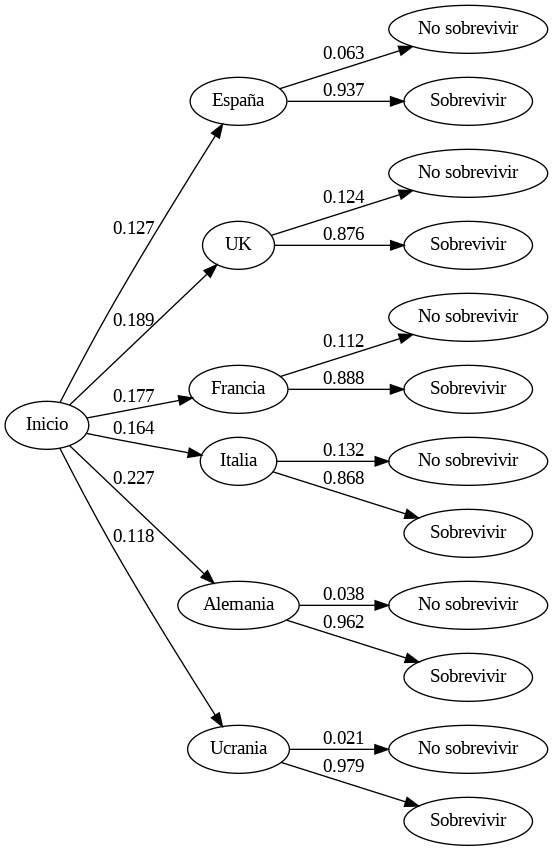

In [ ]:
class DecisionTree:
    def __init__(self):
        self.tree = Digraph(format='png', engine='dot')
        self.tree.attr(rankdir='LR')  # Disposición horizontal

    def add_node(self, node_id, label):
        """ Agrega un nodo al árbol """
        self.tree.node(node_id, label)

    def add_edge(self, from_node, to_node, probability):
        """ Agrega un enlace entre nodos con una probabilidad """
        self.tree.edge(from_node, to_node, label=f'{probability:.3f}')

    def render(self, filename='decision_tree'):
        """ Genera y muestra el árbol """
        filepath = filename + '.png'
        self.tree.render(filename, format='png')  # Genera el archivo PNG
        return Image(filename=filepath)  # Muestra la imagen en Colab

# Crear árbol de decisión
tree = DecisionTree()

# Nodo raíz: Inicio
tree.add_node('Start', 'Inicio')

# Lista de países y probabilidades iniciales
countries = {
    'España': 0.127,
    'UK': 0.189,
    'Francia': 0.177,
    'Italia': 0.164,
    'Alemania': 0.227,
    'Ucrania': 0.118
}

# Probabilidades de morir o no morir en cada país
death_probabilities = {
    'España': 0.063,
    'UK': 0.124,
    'Francia': 0.112,
    'Italia': 0.132,
    'Alemania': 0.038,
    'Ucrania': 0.021
}

# Agregar nodos y conexiones para cada país
for country, prob in countries.items():
    country_node = f'Node_{country}'
    tree.add_node(country_node, country)
    tree.add_edge('Start', country_node, prob)

    # Nodos de resultado (morir o no morir)
    death_node = f'Death_{country}'
    survive_node = f'Survive_{country}'

    tree.add_node(death_node, 'No sobrevivir')
    tree.add_node(survive_node, 'Sobrevivir')

    tree.add_edge(country_node, death_node, death_probabilities[country])
    tree.add_edge(country_node, survive_node, 1 - death_probabilities[country])

# Renderizar y mostrar el árbol en Google Colab
tree.render()


* Explicación del árbol <br>

En el primer nodo tenemos cada uno de los paises que estamos analizando. Por cada uno de ellos, tenemos la probabilidad de que la persona que seleccionemos provenga de ahí. Como expliqué antes, esta probabilidad la estimé a partir de la población de cada uno de los seis países y considerando como el universo a la suma de la poblacion de todos ellos.

El segundo nodo parte de cada país, es decir, en cada país las personas con covid o sobreviven o no sobreviven con cierta probabilidad. Esta probabilidad la estimé a partir de los datos del número de total de casos de covid y el numero de muertes confirmadas.

* ¿Como funciona? <br>

Para explicar el funcionamiento, regresemos al ejercicio 1 que solicitó estimar la probabilidad de sobrevivir en cualquiera de los 6 países. En el arbol, debemos considerar únicamente los nodos de "sobrevive" y multiplicamos por la probabilidad de estar en ese país. Por ejemplo, para el caso de España, la probalilidad de sobrevivir es de 0.937 y la probabilidad de estar en España es de 0.127, por tanto, la probabilidad de que el sobreviviente provenga de España es de (0.937)(0.127)=0.119 o de 11.9%. Esto se realiza para todos los paises y sumamos para obtener que la probabilidad de sobrevivencia en cualquiera de estos paises es de 0.912